<p style="font-family:verdana;color:#29285D;font-size:200%;text-align:center"><b>🛒
    Air Quality forecasting(CO2 emissions)  🛒<br>
    </p> 
<p style="font-family:verdana;text-align:center">***************</p>



<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 1 : Understand The Business Problem </h2> 

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Business Statement 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
          To forecast Co2 levels for an organization so that the organization can follow government norms
with respect to Co2 emission levels.
        </p>
    </div>

 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 2 : Load The Data </h2> 

In [1]:
#Importing libraries
import warnings
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss 

import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt

from matplotlib import pyplot# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the data
data = pd.read_csv('CO2 dataset.csv')
data.head()                   # will show 1st 5 rows only

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


<h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 3: EDA and Visualization </h2> 

In [3]:
data=data.loc[:214]
data.shape  # will show rows and columns

(215, 2)

In [4]:

data.isnull().sum()          # This functin will show the total null values in our data

Year    0
CO2     0
dtype: int64

In [5]:
data.info()             # this function will show the all information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [6]:
data.describe()          # This function will describe the data

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


In [7]:
data.skew()  # positively skewed

Year    0.000000
CO2     0.362736
dtype: float64

In [8]:
len(data[data['CO2']<1]) # 37% CO2 values are less then 1 

80

In [9]:
data[data['CO2'] == data['CO2'].max()]


,Year,CO2
179,1979,18.2


In [10]:
data[data.duplicated()]              # No duplicated data present in ur dataset

,Year,CO2


In [11]:
data['Year'] = data['Year'].astype(int)      #convert the year column from float to int
data

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
210,2010,15.60000
211,2011,15.60000
212,2012,14.80000
213,2013,14.70000


<h2 style="color:#DC7633;">Visualization </h2>


In [12]:

data.index = pd.to_datetime(data['Year'], format='%Y')
data.drop('Year',axis=1, inplace=True)
data.head()


,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542



<h2 style="color:#DC7633;">Density Plot</h2>


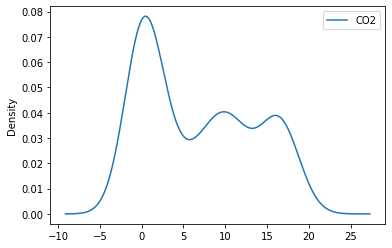

In [13]:
data.plot(kind='kde')
pyplot.show()

5 <h2 style="color:#DC7633;">Histogram</h2>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f422fcd8fd0>]],
      dtype=object)

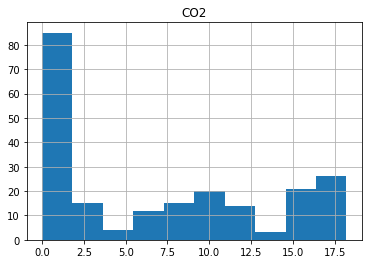

In [14]:
 data.hist()



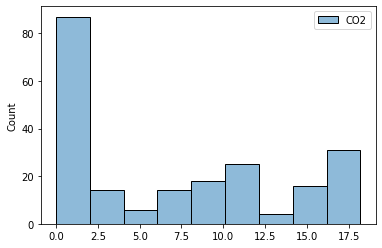

In [15]:
 import seaborn as sns
sns.histplot(data) 


<h2 style="color:#DC7633;">Line plot</h2>


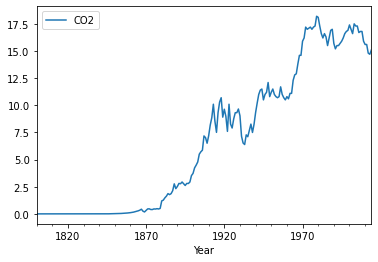

In [16]:
data.plot()              # we can see there is a upword trend in plot

<h2 style="color:#DC7633;">Box Plot</h2>


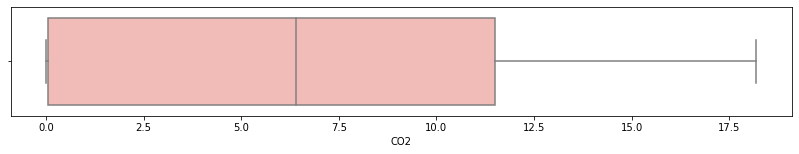

In [17]:
# Boxplot for ever
import seaborn as sns
plt.figure(figsize=(14,2))
sns.boxplot(x = data['CO2'], palette='Pastel1')

<h2 style="color:#DC7633;">Lag Plot</h2>


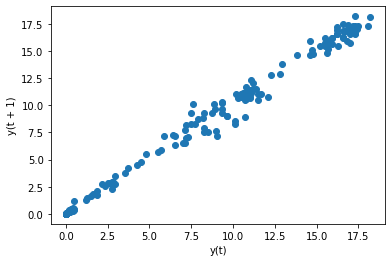

In [18]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(data)
pyplot.show()                  # data is linear

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) After the total observation we can see the trend of our data and we have higher rate between -5 to +5<br><br>
          2) There is trend in ur data because after some perid its going high suddenly and its moving up direction<br><br>
           3) The Data is linear we can see using log plot
        </p>
    </div>



<h2 style="color:#DC7633;">seasonal_decomposet</h2>


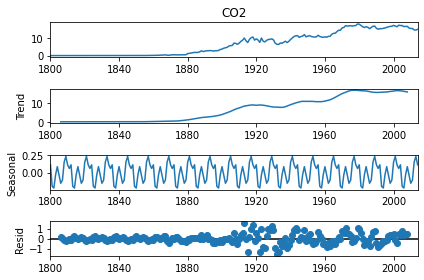

In [19]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(data.CO2,period=12)
decompose_ts_add.plot()
plt.show()

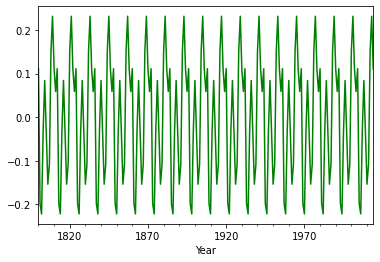

In [20]:
seasonality=decompose_ts_add.seasonal
seasonality.plot(color='green')

 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) In the seasonality graph, we can see the seasonality structure for every year, which is cyclic and repeatedly providing the same value. <br><br>
  2) To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an              autocorrelation plot.<br>
        </p>
    </div>

<h2 style="color:#DC7633;">ACF Plot</h2>


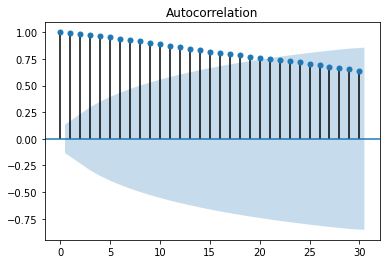

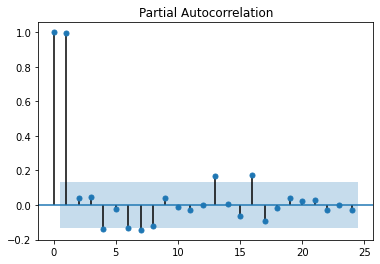

In [21]:
#To check for the stationarity of the time series, statsmodels provides a plot_acf method to plot an autocorrelation plot.
# It will check the correlation between previous data 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(data,lags=30)
plot_pacf(data)
pyplot.show()


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        1)  Here the blue area is the confidence interval<br><br>
         2) Each candle is present on previous or historical data it means if we know the historical/Past year CO2 then we             can forecast next year CO2 <br><br>
           3) There are strongly psitive correlation 
    </p>
    </div>


 <h2 style="background-color:green;font-family:verdana;color:white;font-size:100%;text-align:center;border-radius:10px 10px;letter-spacing:0.5px;padding: 10px"> Step 4 : Pre-Process Data </h2> 

<h3 style="color:orange;">Stationary data means? </h3>

1) constant mean

2) constant variance

3) constant covariance (uncorrelated)

We verify this by observing change in mean, variance, autocorrelation and with a statistical test (ADFuller test)


 <h3 style="color:green;">Following are the Techniques to check data is stationary or not ?</h3>

1) Augmented Dickey-fuller test

2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS)

3) Rolling Statistics


<h3 style="color:blue;">1) Augmented Dickey-fuller test or not? </h3>


In [22]:
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")


print("\n > Is the de-trended data stationary ?")
dftest = adfuller(data['CO2'].dropna(), autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

Observations of Dickey-fuller test

 > Is the de-trended data stationary ?
Test statistic = -0.378
P-value = 0.914
Critical values :
	1%: -3.4612821203214907 - The data is not stationary with 99% confidence
	5%: -2.875142613826617 - The data is not stationary with 95% confidence
	10%: -2.574020122281422 - The data is not stationary with 90% confidence


 <div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        Augmented Dicky Fuller test is a statistical test for stionarity.<br> 
        If the p value is less than 0.05, the series is stationary, otherwise non-stationary. 
    </p>
    </div>

<h3 style="color:blue;">2) Kwiatkowski-Phillips-Schmidt-Shin (KPSS) or not? </h3>


In [23]:
result_kpss_ct_log=kpss(data['CO2'],regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.220000
p-value: 0.010000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         If the p-value is less than a predefined alpha level (typically 0.05), we reject the null hypothesis.      
    </p>
    </div>

 <h3 style="color:blue;">3) Rolling Statistics Test</h3>


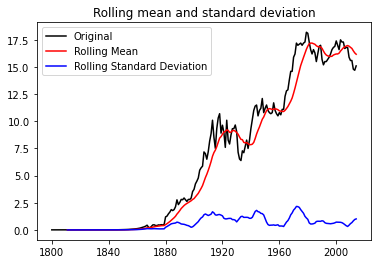

In [24]:
rmean=data.rolling(window=12).mean()
rstd=data.rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
        In this graph we can see mean and variance is not constant so we can say our data is non stationary 
    </p>
    </div>

  <h2 style="color:Orange;">    Making Time Series Stationary Test</h2>
<h3 style="color:Green;">    Differencing Test</h3>
<h4 style="color:blue;">  First  Differencing Test</h4>


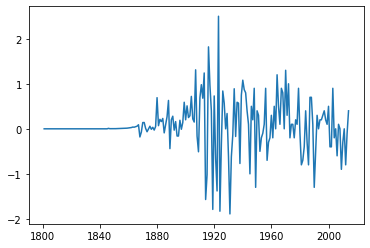

In [25]:
import numpy as np

 # making the data stationary
#data['First Difference'] = data['CO2'] - data['CO2'].shift(1)
#plt.plot(data['First Difference'])
#data1=data.copy()
data['First Difference'] = data['CO2'] - data['CO2'].shift(1)
plt.plot(data['First Difference'])


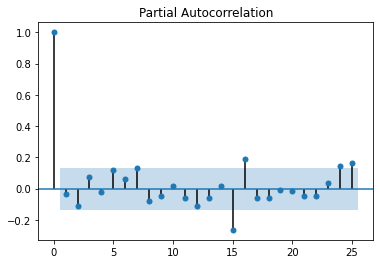

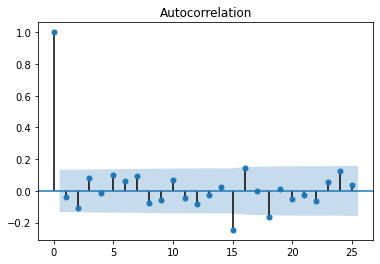

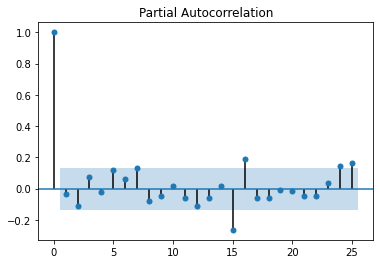

In [26]:
plot_acf(data['First Difference'].dropna(),lags=25)
plot_pacf(data['First Difference'].dropna(),lags=25)

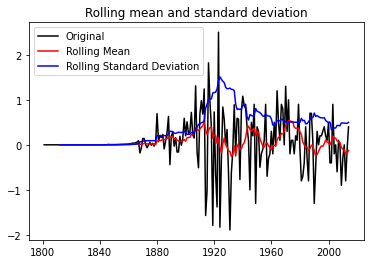

In [27]:
rmean=data['First Difference'].rolling(window=12).mean()
rstd=data['First Difference'].rolling(window=12).std()
#print(rmean,rstd)
orig=plt.plot(data['First Difference'] , color='black',label='Original')
mean= plt.plot(rmean , color='red',label='Rolling Mean')
std=plt.plot(rstd,color='blue',label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title("Rolling mean and standard deviation")
plt.show(block=False)

In [28]:
from statsmodels.tsa.stattools import adfuller

print(" > Is the data stationary ?")
dftest = adfuller(data['First Difference'].dropna(),autolag='AIC')
print("Test statistic = {:.3f}".format(dftest[0]))
print("P-value = {:.3f}".format(dftest[1]))
print("Critical values :")
for k, v in dftest[4].items():
    print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))
    

 > Is the data stationary ?
Test statistic = -3.780
P-value = 0.003
Critical values :
	1%: -3.4638151713286316 - The data is  stationary with 99% confidence
	5%: -2.876250632135043 - The data is  stationary with 95% confidence
	10%: -2.574611347821651 - The data is  stationary with 90% confidence


In [29]:
result_kpss_ct_log=kpss(data['First Difference'].dropna(),regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],2))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.110000
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


<div style="color:white;
           display:fill;
           background-color:#29285D;
           padding: 10px;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h3 style="color:white;padding-left:20px"><b>Interface 👀</b></h3>
       <p style="color:white;font-size:110%;padding-left:50px">
         1) p value is less than 0.05, the series is stationary. <br>
        2) In this graph we can see mean and variance is not constant so we can say our data is non stationary<br> 
         3) If the p-value is greater than a predefined alpha level (typically 0.05), we accept the null hypothesis.      
    </p>
    </div>

In [30]:
 data

,CO2,First Difference
Year,,
1800-01-01,0.00568,NaN
1801-01-01,0.00561,-0.00007
1802-01-01,0.00555,-0.00006
1803-01-01,0.00548,-0.00007
1804-01-01,0.00542,-0.00006
...,...,...
2010-01-01,15.60000,-0.30000
2011-01-01,15.60000,0.00000
2012-01-01,14.80000,-0.80000


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [32]:
Train = data.head(180)
Test =data.tail(35)

In [33]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

  <h2 style="color:Orange;">  Simple Exponential Method</h2>


Train MAE: 0.6108156764737803
Test MAE: 0.7594402120707794 

Train RMSE : 0.9963994338145259 
Test RMSE : 0.9711142323936686 

Train MAPE : 19.981685225960227 
Test MAPE : 4.810371631853253


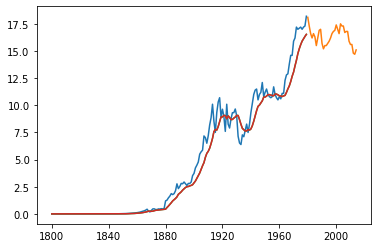

In [34]:

ses_model = SimpleExpSmoothing(Train['CO2']).fit(smoothing_level=0.2)
#ses_model = SimpleExpSmoothing(Train.CO2).fit(smoothing_level=0.3, optimized=False)
pred_ses_train = ses_model.predict(start = Train.index[0],end = Train.index[-1])

pred_ses_test = ses_model.predict(start = Test.index[0],end = Test.index[-1])

plt.plot(Train.CO2)
plt.plot(Test.CO2)

plt.plot(pred_ses_train)
plt.plot(pred_ses_train)

rmse = sqrt(mean_squared_error(Train.CO2, pred_ses_train))
print('Train MAE:', mean_absolute_error(Train.CO2,pred_ses_train)) 
rmse1 = sqrt(mean_squared_error(Test.CO2, pred_ses_test))
print('Test MAE:', mean_absolute_error(Test.CO2,pred_ses_test),'\n') 

print('Train RMSE :',rmse ,'\n' 'Test RMSE :',rmse1,'\n')
print('Train MAPE :',MAPE(pred_ses_train,Train.CO2) ,'\n''Test MAPE :',MAPE(pred_ses_test,Test.CO2))



  <h2 style="color:Orange;"> Holt method</h2>


Train MAE: 1.4160751613499574
Test MAE: 1.4697652088725872 

Train RMSE : 1.8621339923699782 
Test RMSE : 1.9823784453655764 



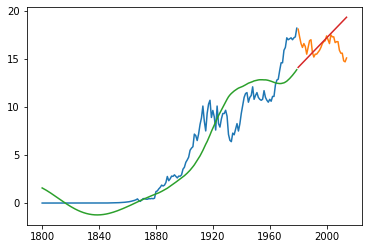

In [35]:
# Holt method 
hw_model = Holt(Train["CO2"]).fit(smoothing_level=0.02, smoothing_slope=0.2)

pred_hw_train = hw_model.predict(start = Train.index[0],end = Train.index[-1])

pred_hw_test = hw_model.predict(start = Test.index[0],end = Test.index[-1])

plt.plot(Train.CO2)
plt.plot(Test.CO2)

plt.plot(pred_hw_train)
plt.plot(pred_hw_test)

rmse_train = sqrt(mean_squared_error(Train.CO2, pred_hw_train))
rmse_test = sqrt(mean_squared_error(Test.CO2, pred_hw_test))

print('Train MAE:', mean_absolute_error(Train.CO2,pred_hw_train)) 
print('Test MAE:', mean_absolute_error(Test.CO2,pred_hw_test),'\n') 

print('Train RMSE :',rmse_train ,'\n' 'Test RMSE :',rmse_test,'\n')
#print('Train MAPE :',MAPE(pred_hw_train,Train.CO2) ,'\n''Test MAPE :',MAPE(pred_hw_test,Test.CO2))

  <h2 style="color:Orange;"> Holts winter exponential smoothing with additive seasonality and additive trend
</h2>



Train RMSE : 0.5432615233231581 
Test RMSE : 5.109619692304882 

Train MAPE : 563.9535184847776 
Test MAPE : 29.337181360060075 

Train MAE: 0.33025691677331637
Test MAE: 4.717558369938694


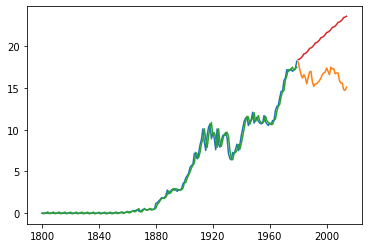

In [36]:
# Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(Train["CO2"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add_train = hwe_model_add_add.predict(start = Train.index[0],end = Train.index[-1])
pred_hwe_add_add_test = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
#MAPE(pred_hwe_add_add,Test.CO2)
plt.plot(Train.CO2)
plt.plot(Test.CO2)
plt.plot(pred_hwe_add_add_train)
plt.plot(pred_hwe_add_add_test)
rmseTrain = sqrt(mean_squared_error(Train.CO2, pred_hwe_add_add_train))
rmseTest = sqrt(mean_squared_error(Test.CO2, pred_hwe_add_add_test))

print('Train RMSE :',rmseTrain ,'\n''Test RMSE :',rmseTest,'\n')
print( 'Train MAPE :',MAPE(pred_hwe_add_add_train,Train.CO2),'\n''Test MAPE :',MAPE(pred_hwe_add_add_test,Test.CO2),'\n')
print('Train MAE:', mean_absolute_error(Train.CO2,pred_hwe_add_add_train)) 
print('Test MAE:', mean_absolute_error(Test.CO2,pred_hwe_add_add_test)) 

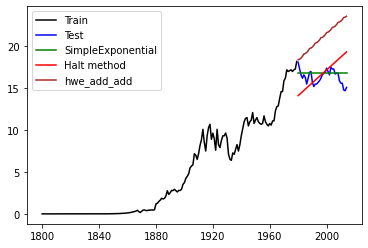

In [37]:
# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["CO2"], label='Train',color="black")
plt.plot(Test.index, Test["CO2"], label='Test',color="blue")
plt.plot(pred_ses_test.index, pred_ses_test, label='SimpleExponential',color="green")
plt.plot(pred_hw_test.index, pred_hw_test, label='Halt method',color="red")
plt.plot(pred_hwe_add_add_test.index,pred_hwe_add_add_test,label="hwe_add_add",color="brown")
plt.legend(loc='best')

In [38]:
##### separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 205, Validation 10


In [39]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
#train1 = pd.read_excel('CO2 dataset.xlsx', header=None, index_col=0, parse_dates=True, squeeze=True)
X = data['CO2'].values
train, test = X[1:180], X[180:]


In [40]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('\nRMSE :',rmse)
print('MAE:', mean_absolute_error(test,predictions)) 


>Predicted=18.200, Expected=18.100
>Predicted=18.100, Expected=17.300
>Predicted=17.300, Expected=16.600
>Predicted=16.600, Expected=16.200
>Predicted=16.200, Expected=16.600
>Predicted=16.600, Expected=16.300
>Predicted=16.300, Expected=15.500
>Predicted=15.500, Expected=16.200
>Predicted=16.200, Expected=16.900
>Predicted=16.900, Expected=17.000
>Predicted=17.000, Expected=15.700
>Predicted=15.700, Expected=15.200
>Predicted=15.200, Expected=15.500
>Predicted=15.500, Expected=15.500
>Predicted=15.500, Expected=15.700
>Predicted=15.700, Expected=15.900
>Predicted=15.900, Expected=16.200
>Predicted=16.200, Expected=16.600
>Predicted=16.600, Expected=16.800
>Predicted=16.800, Expected=16.900
>Predicted=16.900, Expected=17.400
>Predicted=17.400, Expected=17.000
>Predicted=17.000, Expected=16.600
>Predicted=16.600, Expected=17.500
>Predicted=17.500, Expected=17.300
>Predicted=17.300, Expected=17.300
>Predicted=17.300, Expected=16.700
>Predicted=16.700, Expected=16.800
>Predicted=16.800, E


  <h2 style="color:Orange;">   ARIMA Hyperparameters</h2>


In [41]:
# grid search ARIMA parameters for a time series

import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
print(rmse)

0.5096217084409629



<h2 style="color:Orange;">  Grid search for p,d,q values</h2>


In [42]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    #dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                    
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:

# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=10.516
ARIMA(0, 0, 1) RMSE=5.438
ARIMA(0, 1, 0) RMSE=0.533
ARIMA(0, 1, 1) RMSE=0.542
ARIMA(0, 1, 2) RMSE=0.532
ARIMA(0, 2, 0) RMSE=0.687
ARIMA(0, 2, 1) RMSE=0.569
ARIMA(0, 2, 2) RMSE=0.584
ARIMA(1, 0, 0) RMSE=0.507
ARIMA(1, 1, 0) RMSE=0.541
ARIMA(1, 1, 2) RMSE=0.530
ARIMA(1, 2, 0) RMSE=0.685
ARIMA(1, 2, 1) RMSE=0.581
ARIMA(2, 0, 0) RMSE=0.509
ARIMA(2, 1, 0) RMSE=0.534
ARIMA(2, 1, 1) RMSE=0.531
ARIMA(2, 1, 2) RMSE=0.534
ARIMA(2, 2, 0) RMSE=0.620
ARIMA(2, 2, 1) RMSE=0.582
ARIMA(2, 2, 2) RMSE=0.576
Best ARIMA(1, 0, 0) RMSE=0.507


<h2 style="color:Orange;">  Build Model based on the optimized values</h2>


In [44]:
##### save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy

In [45]:
train_data = data.loc[:'2000-01-01','CO2']
test_data = data.loc['2000-01-01':]

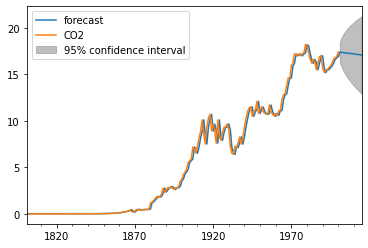

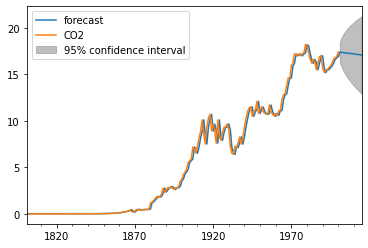

In [46]:

# fit model
model = ARIMA(train_data, order=(1,0,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 215)



In [47]:

from statsmodels.tsa.ar_model import AutoReg


# Instantiate and fit the AR model with training data
ar_model = AutoReg(train_data, lags=15).fit()

# Print Summary
#print(ar_model.summary())

RMSE: 2.8993895391271165
MAE: 2.4944883862327614


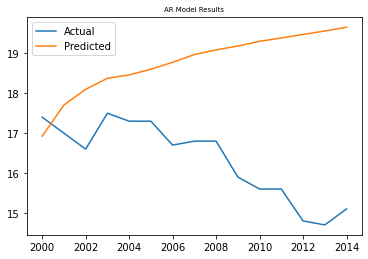

In [48]:
ar_forecast = ar_model.predict('2000-01-01', '2014-01-01')

plt.title('AR Model Results', size=7)
plt.plot(data.loc['2000-01-01':,'CO2'],label='Actual')
plt.plot(ar_forecast,label='Predicted')
plt.legend();

print('RMSE:', np.sqrt(mean_squared_error(data.loc['2000-01-01':,'CO2'],ar_forecast)))
print('MAE:', mean_absolute_error(data.loc['2000-01-01':,'CO2'],ar_forecast))

In [49]:
train_datafd = data.loc['1801-01-01':'2000-01-01','First Difference']

# Instantiate and fit the AR model with training data
ar_modelfd = AutoReg(train_datafd, lags=15).fit()

# Print Summary
#print(ar_modelfd.summary())

RMSE: 0.5778821815728581
MAE: 0.4887965066595153


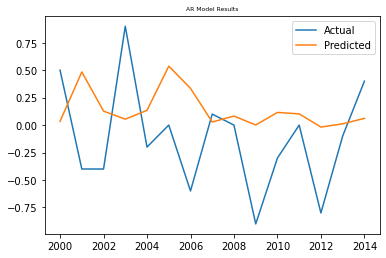

In [50]:


ar_forecastfd = ar_modelfd.predict('2000-01-01', '2014-01-01')
plt.title('AR Model Results', size=6)
plt.plot(data.loc['2000-01-01':,'First Difference'],label='Actual')
plt.plot(ar_forecastfd,label='Predicted')
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(data.loc['2000-01-01':,'First Difference'],ar_forecastfd)))
print('MAE:',mean_absolute_error(data.loc['2000-01-01':,'First Difference'],ar_forecastfd))

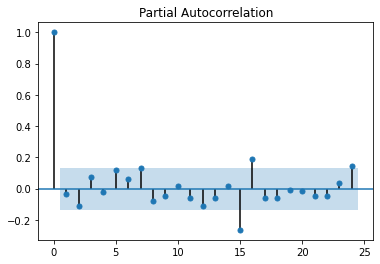

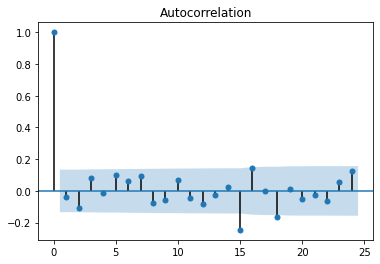

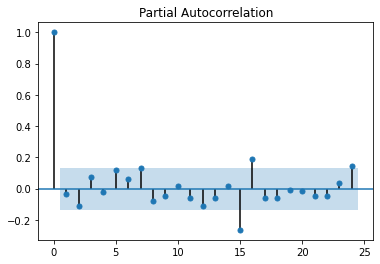

In [51]:
plot_acf(data.CO2.diff().dropna())

plot_pacf(data.CO2.diff().dropna())

RMSE: 0.4937785044180157
MAE 0.42215544587373893


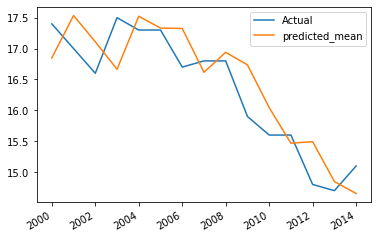

In [52]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

arima2 = ARIMA(data.loc[:,'CO2'], order=(7, 1, 2))
results2 = arima2.fit()
predictions2 = results2.predict('2000-01-01', '2014-01-01')

plt.plot(data.loc['2000-01-01':,'CO2'],label='Actual')
predictions2.plot()
plt.legend();

print('RMSE:',np.sqrt(mean_squared_error(data.loc['2000-01-01':,'CO2'],predictions2)))
print('MAE',mean_absolute_error(data.loc['2000-01-01':,'CO2'],predictions2))
#print('MAPE',mean_absolute_percentage_error(data.loc['2000-01-01':,'First Difference'],predictions2)*100) 

                               SARIMAX Results                                
Dep. Variable:                    CO2   No. Observations:                  215
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -167.416
Date:                Wed, 07 Sep 2022   AIC                            354.832
Time:                        15:41:59   BIC                            388.492
Sample:                    01-01-1800   HQIC                           368.434
                         - 01-01-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5400      0.113     -4.785      0.000      -0.761      -0.319
ar.L2         -0.8673      0.098     -8.857      0.000      -1.059      -0.675
ar.L3          0.0399      0.067      0.596      0.5

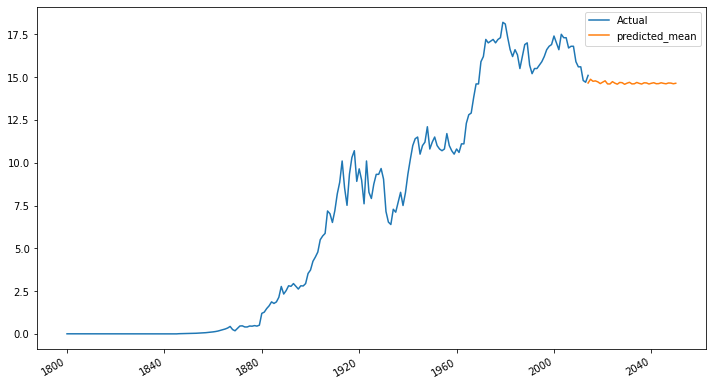

In [53]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(data.loc[:,'CO2'], order=(7,1,2))
resultf = arima.fit()
predictionf = resultf.predict('2014-01-01', '2050-01-01')
plt.figure(figsize=(12,7))
plt.plot(data.loc[:,'CO2'],label='Actual')
predictionf.plot()
plt.legend();
print(resultf.summary())

In [54]:
#Install streamlit 
# NB : If any error occurs during installation process , run it again
!pip install -q streamlit
!npm install -g localtunnel -U

     |████████████████████████████████| 9.1 MB 5.5 MB/s 
     |████████████████████████████████| 235 kB 48.7 MB/s 
     |████████████████████████████████| 164 kB 40.2 MB/s 
     |████████████████████████████████| 181 kB 49.3 MB/s 
     |████████████████████████████████| 4.7 MB 35.8 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 6.4 MB/s 
/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.443s


In [64]:
%%writefile main.py 


import streamlit as st
import pandas as pd 
from statsmodels.tsa.arima.model import ARIMA
import numpy as np 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import pyplot



data = pd.read_csv("CO2 dataset.csv")
data2 = pd.read_csv("CO2 dataset.csv",header=0, index_col=0,parse_dates=True )


final_arima = ARIMA(data2['CO2'],order = (7,1,2))
final_arima = final_arima.fit()



st.title("Forecasting CO2 Emission")
nav = st.sidebar.radio("Navigation",["About data","Prediction","Forecast"])
if nav == "About data":
    st.subheader("Data")
    data
    st.subheader("Scatter plot of the data")
    st.set_option('deprecation.showPyplotGlobalUse', False)
    plt.figure(figsize = (10,5))
    plt.scatter(data["Year"],data["CO2"])
    plt.ylim(0)
    plt.xlabel("Years")
    plt.ylabel("CO2 Emission")
    plt.tight_layout()
    st.pyplot()


    st.subheader("Line plot of the data") 
    st.line_chart(data=data.CO2, width=150, height=300, use_container_width=True)
   

    st.subheader("Histogram of the data") 
    fig= plt.figure(figsize=(10,4))
    plt.hist(data.CO2)
    st.pyplot(fig)
 

  
  
if nav == "Prediction":
   predict = final_arima.fittedvalues
   data2["Predicted_CO2"] = predict
   data2
   plt.plot(data2.CO2, label='original',color='black')
   plt.plot(predict, label='Predicted',color='red')
   plt.title('Prediction')
   plt.legend(loc='upper left', fontsize=8)
   st.pyplot()
  


if nav == "Forecast":
    
    year = st.slider("Select number of Year from 2015",1,21,step = 1)

    st.subheader("Forecasting the data for next few years")
    
    
    pred = final_arima.forecast(year)
   
    if st.button("Predict"):
       st.subheader(f"Your predicted CO2 emission from year 2015" )
       pred

       st.subheader("Line plot of the Forecasted data")
       plt.plot(data2.CO2, label='original')
       plt.plot(pred, label='Predicted')
       plt.title('Forecast')
       plt.legend(loc='upper left', fontsize=8)
       st.pyplot()
  

       st.subheader("Histogram of the Forecasted data") 
       fig1= plt.figure(figsize=(10,4))
       plt.hist(pred)
       st.pyplot(fig1)

Overwriting main.py


In [ ]:

!streamlit run main.py & npx localtunnel --port 8501 


2022-09-07 15:53:39.349 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.087s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.238.65.190:8501

your url is: https://young-tips-peel-35-238-65-190.loca.lt
